In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

plt.rcParams["figure.figsize"] = (20,5)

              Open    High     Low   Close     Volume
Date                                                 
2016-12-17  785.17  792.51  784.86  790.83   78989800
2016-12-18  791.01  794.74  788.03  790.53   60524400
2016-12-19  790.69  793.61  790.32  792.71   74886400
2016-12-20  792.25  801.34  791.50  800.88   99629296
2016-12-21  800.64  834.28  799.41  834.28  155576000


C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



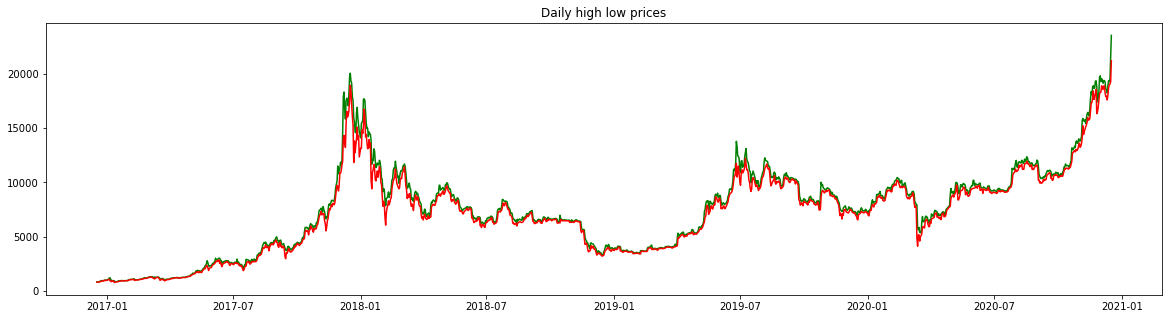

In [23]:
# Load the data
bitcoin_data = pd.read_csv('./data/Bitcoin.csv', index_col='Date', parse_dates=True)

# Print the top 5 rows
print(bitcoin_data.head())

# Plot the daily high price
plt.plot(bitcoin_data['High'], color='green')
# Plot the daily low price
plt.plot(bitcoin_data['Low'], color='red')

plt.title('Daily high low prices')
plt.show()

##### A line plot gives us a quick impression of the data. As we can see, Bitcoin prices have been on a rollercoaster ride.

### Plot a candlestick chart
- A candlestick chart is a style of chart that packs multiple pieces of price information into one chart. It can provide us with a good sense of price action and visual aid for technical analysis.

In [24]:
# Define the candlestick data
candlestick = go.Candlestick(
    x=bitcoin_data.index,
    open=bitcoin_data['Open'],
    high=bitcoin_data['High'],
    low=bitcoin_data['Low'],
    close=bitcoin_data['Close'])

# Create a candlestick figure   
fig = go.Figure(data=[candlestick])
fig.update_layout(title='Bitcoin prices')                        

# Show the plot
fig.show()

##### Compared to a simple line plot, a candlestick chart provides richer price information.

### Plot a return histogram
- As a trader, it is important to analyze an asset's return profile, such as ranges of price changes, return distributions, etc. Over the years, Tesla fans and short sellers have been either betting on or against Tesla stocks aggressively, leading to volatile stock prices.

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



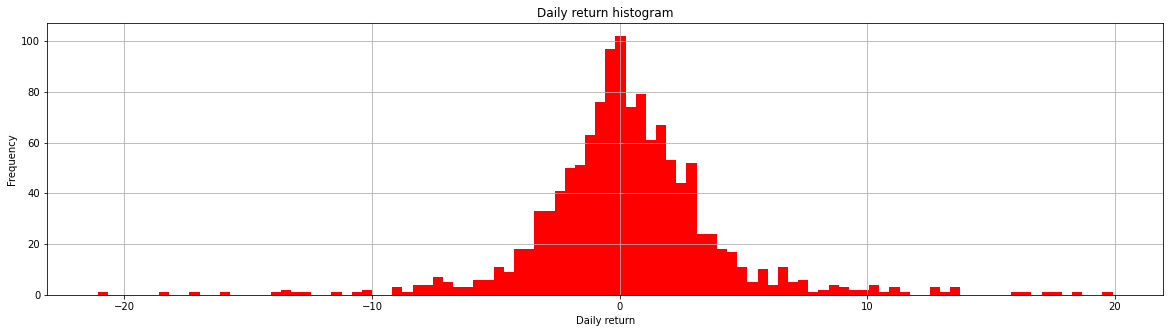

In [25]:
tsla_data = pd.read_csv('./data/TSLA.csv')

# Calculate daily returns
tsla_data['daily_return'] = tsla_data['Close'].pct_change() * 100

# Plot the histogram
tsla_data['daily_return'].hist(bins=100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.title('Daily return histogram')
plt.show()

##### The histogram shows the majority of daily returns are between -4% and +4%, but occasionally the prices had big negative or positive 15% changes, so the stock is indeed very volatile.

### Calculate and plot SMAs
- Daily price data is inherently messy and noisy. We want to analyze the Apple stock daily price data, and plan to add a simple moving average (SMA) indicator to smooth out the data. Specifically, we decide to use the 50-day SMA.


C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



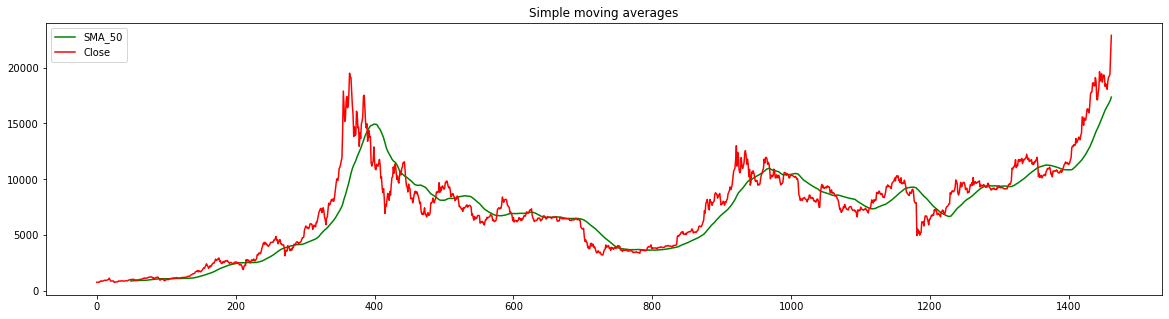

In [26]:
aapl_data = pd.read_csv('./data/Bitcoin.csv')

# Calculate SMA
aapl_data['sma_50'] = aapl_data['Close'].rolling(50).mean()

# Plot the SMA
plt.plot(aapl_data['sma_50'], color='green', label='SMA_50')
# Plot the close price
plt.plot(aapl_data['Close'], color='red', label='Close')

# Customize and show the plot
plt.title('Simple moving averages')
plt.legend()
plt.show()

##### Notice the SMA moves along with the price data but is showing fewer ripples. It helps to determine if an asset price is in a bullish or bearish trend.

## The bt process
- The bt package provides a flexible framework for defining and backtesting trading strategies in Python. A trading strategy is a method of buying and selling financial assets based on predefined rules. Backtesting is a way to assess the effectiveness of a strategy by testing it on historical data.

### Define and backtest a simple strategy
- Create a strategy to trade the so-called "FAANG" stocks, which is an acronym referring to the stocks of the five most popular and best-performing American technology companies: Facebook, Amazon, Apple, Netflix, and Alphabet (a.k.a. Google).
- The idea is simple, we will hold an equal amount of each stock in our portfolio. Every week the strategy will buy or sell shares as needed in order to balance the equal weights.
- First, we will use the bt package to download the historical price data for the "FAANG" stocks by their tickers. Second, we will define the strategy, which specifies buying an equal amount of each stock, and rebalance every week. Lastly, we will run the backtest and plot the result.

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



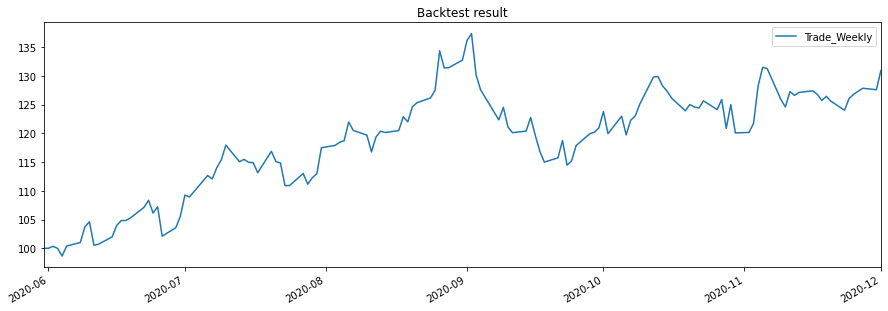

In [27]:
import bt

# Download historical prices
bt_data = bt.get('fb, amzn, goog, nflx, aapl', 
                 start='2020-6-1', end='2020-12-1')
# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

##### The test shows over a six-month period, using this strategy to trade the “FAANG” stocks can increase your portfolio value over 30%. The strategy looks viable. 

### Calculate and plot two EMAs
- A 12-period EMA and 26-period EMA are two moving averages used in calculating a more complex indicator called **MACD (Moving Average Convergence Divergence)** 
- The MACD turns two EMAs into a **momentum indicator** by subtracting the longer EMA from the shorter one.

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



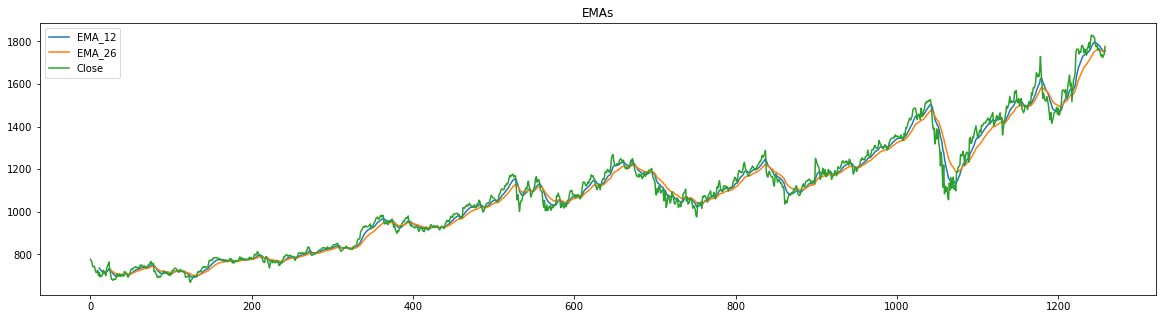

In [28]:
import talib

stock_data = pd.read_csv('data/GOOG.csv')

# Calculate 12-day EMA
stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# Calculate 26-day EMA
stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

# Plot the EMAs with price
plt.plot(stock_data['EMA_12'], label='EMA_12')
plt.plot(stock_data['EMA_26'], label='EMA_26')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

##### We can see a shorter-term EMA moves faster with the price than the longer-term EMA, hence comparing the gap between them can reveal how fast the price is changing, that is, the price momentum.

### SMA vs. EMA
- SMA and EMA are both commonly-used trend indicators. SMA gives equal weight to all data points, while EMA applies more weight to recent data points. 


C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



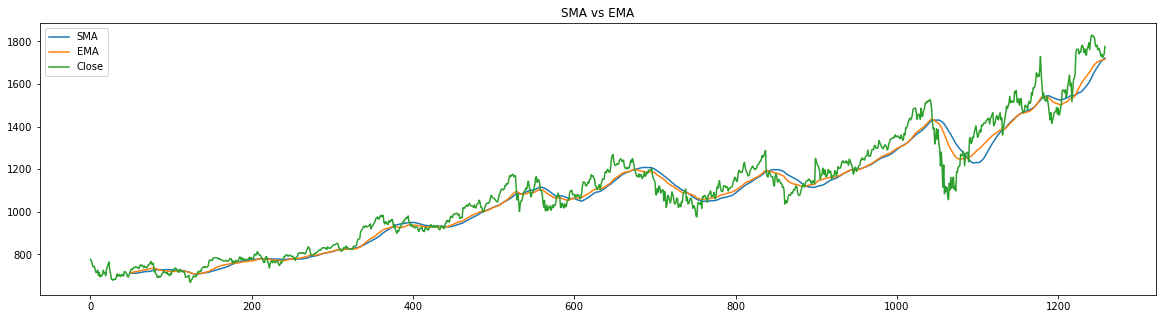

In [29]:
# Calculate the SMA
stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=50)
# Calculate the EMA
stock_data['EMA'] = talib.EMA(stock_data['Close'], timeperiod=50)

# Plot the SMA, EMA with price
plt.plot(stock_data['SMA'], label='SMA')
plt.plot(stock_data['EMA'], label='EMA')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('SMA vs EMA')
plt.show()

##### The EMA is less smooth and more responsive to sudden price spikes. If we have a shorter trading timeframe and want to be more sensitive to the recent price fluctuations, EMA should be our choice.

### Strength indicator: ADX

#### Calculate the ADX
- The average directional movement index (ADX) was developed by J. Welles Wilder as an indicator of trend strength. It combines two other indicators, the plus directional index (+DI) and minus directional indicator (-DI), and is obtained using lengthy calculations.

In [30]:
# Calculate the ADX with the default time period
stock_data['ADX_14'] = talib.ADX(stock_data['High'],
                            stock_data['Low'], 
                            stock_data['Close'])

# Calculate the ADX with the time period set to 21
stock_data['ADX_21'] = talib.ADX(stock_data['High'],
                            stock_data['Low'], 
                            stock_data['Close'], timeperiod=21)

# Print the last five rows
print(stock_data.tail())

            Date     Open     High      Low    Close  Adj Close   Volume  \
1254  2020-12-21  1713.51  1740.85  1699.00  1739.37    1739.37  1828400   
1255  2020-12-22  1734.43  1737.41  1712.57  1723.50    1723.50   936700   
1256  2020-12-23  1728.11  1747.99  1725.04  1732.38    1732.38  1033800   
1257  2020-12-24  1735.00  1746.00  1729.11  1738.85    1738.85   346800   
1258  2020-12-28  1751.64  1790.73  1746.33  1776.09    1776.09  1393000   

           EMA_12       EMA_26        SMA          EMA     ADX_14     ADX_21  
1254  1763.724902  1755.310012  1708.3392  1711.780514  17.816243  17.274332  
1255  1757.536455  1752.953715  1711.4262  1712.240102  18.064241  16.774606  
1256  1753.666231  1751.429736  1714.6402  1713.029902  17.856784  16.144012  
1257  1751.386811  1750.497904  1718.0556  1714.042454  17.664144  15.543446  
1258  1755.187302  1752.393615  1722.3948  1716.475691  16.952839  15.247274  


### Visualize the ADX
- The ADX can quantify the strength of a trend, but does not suggest the bullish or bearish trend direction. Typically an ADX value above 25 indicates that a trending market is present.

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



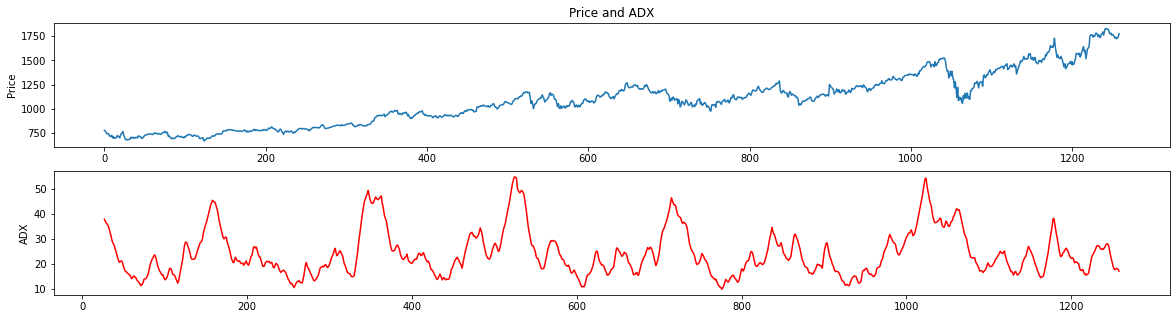

In [31]:
# Calculate ADX
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(stock_data['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

##### ADX is used to measure the strength of a trending market. When the stock was not trending but moving sideways, ADX started to fall.